In [39]:
path="/content/Student_Academic_Performance.csv"

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import joblib

In [41]:
df=pd.read_csv(path)
df.head()

,Gender,HoursStudied/Week,Tutoring,Region,Attendance(%),Parent Education,Exam_Score
0,Male,5.5,No,Urban,72.7,Tertiary,43.5
1,Female,6.8,No,Urban,62.0,Primary,51.7
2,Female,9.7,No,Rural,95.0,Secondary,70.1
3,Male,13.3,Yes,Rural,52.9,NaN,79.5
4,Female,8.9,No,Urban,50.8,NaN,52.2


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             4000 non-null   object 
 1   HoursStudied/Week  4000 non-null   float64
 2   Tutoring           4000 non-null   object 
 3   Region             4000 non-null   object 
 4   Attendance(%)      4000 non-null   float64
 5   Parent Education   3578 non-null   object 
 6   Exam_Score         4000 non-null   float64
dtypes: float64(3), object(4)
memory usage: 218.9+ KB


In [5]:
# From the data-set, there are missing values in Parent Education column and can be seen form this:
# Rows where data is missing
df[df.isnull().any(axis=1)]

,Gender,HoursStudied/Week,Tutoring,Region,Attendance(%),Parent Education,Exam_Score
3,Male,13.3,Yes,Rural,52.9,NaN,79.5
4,Female,8.9,No,Urban,50.8,NaN,52.2
11,Male,2.3,Yes,Rural,85.7,NaN,52.6
17,Male,12.7,No,Urban,89.9,NaN,83.1
28,Female,3.5,No,Urban,72.4,NaN,35.8
...,...,...,...,...,...,...,...
3942,Male,16.0,Yes,Rural,90.0,NaN,100.0
3960,Male,5.1,No,Rural,80.6,NaN,47.0
3962,Male,13.2,Yes,Rural,67.2,NaN,94.4
3970,Male,5.0,Yes,Urban,52.7,NaN,52.4


In [6]:
# Columns where data is missing
df.loc[:, df.isnull().any()]

,Parent Education
0,Tertiary
1,Primary
2,Secondary
3,NaN
4,NaN
...,...
3995,Secondary
3996,Tertiary
3997,Tertiary
3998,Tertiary


In [7]:
# We will train model on 3 bases:
# 1. Drop missing values
# 2. Take mode and assign that values to missing data
# 3. Train a model based on other values and predict for missing values

In [8]:
# Lets first replace categorical with numerical values
# Unique values in columns
print(df["Gender"].unique())
print(df["Tutoring"].unique())
print(df["Region"].unique())
print(df["Parent Education"].unique())

['Male' 'Female']
['No' 'Yes']
['Urban' 'Rural']
['Tertiary' 'Primary' 'Secondary' nan]


In [42]:
# replace 0 and 1 for Region and Gender and use dummies for Parent Education
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})
df['Tutoring'] = df['Tutoring'].map({'Yes': 0, 'No': 1})
df['Region'] = df['Region'].map({'Urban': 0, 'Rural': 1})

In [10]:
df.describe()

,Gender,HoursStudied/Week,Tutoring,Region,Attendance(%),Exam_Score
count,4000.000000,4000.000000,4000.000000,4000.00000,4000.000000,4000.000000
mean,0.510000,9.861025,0.691750,0.39425,75.224150,71.107775
std,0.499962,3.713801,0.461828,0.48875,14.496906,16.748950
min,0.000000,0.000000,0.000000,0.00000,50.000000,16.600000
25%,0.000000,7.400000,0.000000,0.00000,62.600000,59.300000
50%,1.000000,9.900000,1.000000,0.00000,75.600000,71.550000
75%,1.000000,12.600000,1.000000,1.00000,87.700000,83.500000
max,1.000000,16.000000,1.000000,1.00000,100.000000,100.000000


In [11]:
df.head()

,Gender,HoursStudied/Week,Tutoring,Region,Attendance(%),Parent Education,Exam_Score
0,0,5.5,1,0,72.7,Tertiary,43.5
1,1,6.8,1,0,62.0,Primary,51.7
2,1,9.7,1,1,95.0,Secondary,70.1
3,0,13.3,0,1,52.9,NaN,79.5
4,1,8.9,1,0,50.8,NaN,52.2


## 1. Drop missing values

In [12]:
df1=df.dropna(subset=['Parent Education'])

In [13]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3578 entries, 0 to 3999
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             3578 non-null   int64  
 1   HoursStudied/Week  3578 non-null   float64
 2   Tutoring           3578 non-null   int64  
 3   Region             3578 non-null   int64  
 4   Attendance(%)      3578 non-null   float64
 5   Parent Education   3578 non-null   object 
 6   Exam_Score         3578 non-null   float64
dtypes: float64(3), int64(3), object(1)
memory usage: 223.6+ KB


In [14]:
df1.head()

,Gender,HoursStudied/Week,Tutoring,Region,Attendance(%),Parent Education,Exam_Score
0,0,5.5,1,0,72.7,Tertiary,43.5
1,1,6.8,1,0,62.0,Primary,51.7
2,1,9.7,1,1,95.0,Secondary,70.1
5,1,7.9,1,0,73.7,Tertiary,58.8
6,1,7.6,1,0,79.5,Secondary,64.8


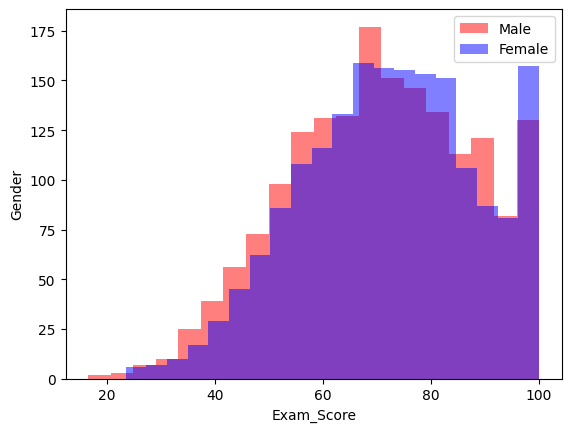

In [15]:
plt.hist(df1[df1["Gender"]==0]["Exam_Score"],bins=20,alpha=0.5,label="Male",color='red')
plt.hist(df1[df1["Gender"]==1]["Exam_Score"],bins=20,alpha=0.5,label="Female",color='blue')
plt.xlabel("Exam_Score")
plt.ylabel("Gender")
plt.legend()
plt.show()

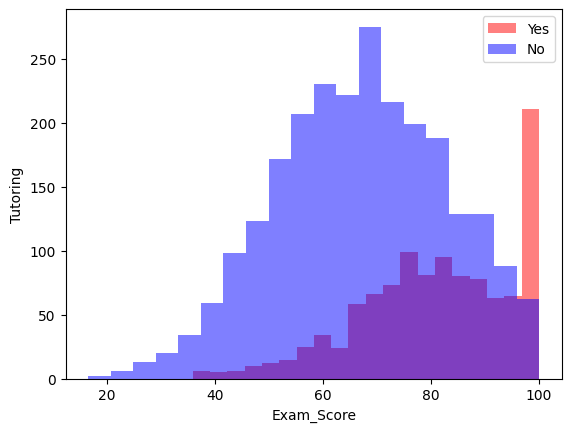

In [97]:
plt.hist(df1["Exam_Score"][df1["Tutoring"]==0],bins=20,alpha=0.5,label="Yes",color='red')
plt.hist(df1["Exam_Score"][df1["Tutoring"]==1],bins=20,alpha=0.5,label="No",color='blue')
plt.xlabel("Exam_Score")
plt.ylabel("Tutoring")
plt.legend()
plt.show()

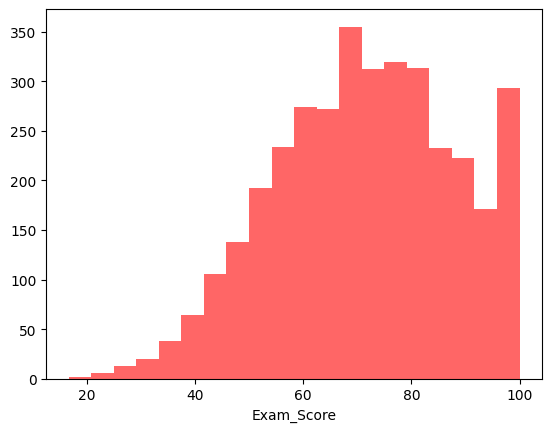

In [ ]:
plt.hist(df1["Exam_Score"],bins=20,alpha=0.6,color='red')
plt.xlabel("Exam_Score")
plt.show()

In [16]:
# df1["Parent Education"]
le=LabelEncoder()
df1.loc[:, "Parent Education"] = le.fit_transform(df1["Parent Education"])

In [17]:
df1.head()

,Gender,HoursStudied/Week,Tutoring,Region,Attendance(%),Parent Education,Exam_Score
0,0,5.5,1,0,72.7,2,43.5
1,1,6.8,1,0,62.0,0,51.7
2,1,9.7,1,1,95.0,1,70.1
5,1,7.9,1,0,73.7,2,58.8
6,1,7.6,1,0,79.5,1,64.8


In [18]:
lr=LinearRegression()
def linear_regression(dataframe):
  X=dataframe.drop(["Exam_Score"],axis=1)
  y=dataframe["Exam_Score"]
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
  lr.fit(X_train,y_train)
  return y_test,lr.predict(X_test)

In [19]:
y_test1,y_pred1=linear_regression(df1)

In [20]:
# Accuracy or r2_score
r2 = r2_score(y_test1, y_pred1)
print("R² Score:", r2)
print("Accuracy (%):", r2 * 100)

R² Score: 0.9114670467157755
Accuracy (%): 91.14670467157755


In [112]:
# mean_squared_error
mse = mean_squared_error(y_test1, y_pred1)
rmse = np.sqrt(mse)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)

Mean Squared Error: 24.202386342048175
Root Mean Squared Error: 4.919592091022199


In [113]:
# Save model
joblib.dump(lr, 'linear_model.pkl')

['linear_model.pkl']

## Take mode and assign that values to missing data

In [21]:
df2=df

In [22]:
df2["Parent Education"].mode()

,Parent Education
0,Secondary


In [23]:
df2.fillna(df2["Parent Education"].mode()[0],inplace=True)

In [24]:
df2.head()

,Gender,HoursStudied/Week,Tutoring,Region,Attendance(%),Parent Education,Exam_Score
0,0,5.5,1,0,72.7,Tertiary,43.5
1,1,6.8,1,0,62.0,Primary,51.7
2,1,9.7,1,1,95.0,Secondary,70.1
3,0,13.3,0,1,52.9,Secondary,79.5
4,1,8.9,1,0,50.8,Secondary,52.2


In [25]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             4000 non-null   int64  
 1   HoursStudied/Week  4000 non-null   float64
 2   Tutoring           4000 non-null   int64  
 3   Region             4000 non-null   int64  
 4   Attendance(%)      4000 non-null   float64
 5   Parent Education   4000 non-null   object 
 6   Exam_Score         4000 non-null   float64
dtypes: float64(3), int64(3), object(1)
memory usage: 218.9+ KB


In [26]:
df2.loc[:, "Parent Education"] = le.fit_transform(df2["Parent Education"])

In [27]:
y_test2,y_pred2=linear_regression(df2)

In [28]:
# Accuracy or r2_score
r2 = r2_score(y_test2, y_pred2)
print("R² Score:", r2)
print("Accuracy (%):", r2 * 100)

R² Score: 0.9122961861099411
Accuracy (%): 91.22961861099411


## Train a model based on other values and predict for missing values

In [43]:
df3=df
df3_train=df3.drop(["Exam_Score"],axis=1)
df3_train.head()

,Gender,HoursStudied/Week,Tutoring,Region,Attendance(%),Parent Education
0,0,5.5,1,0,72.7,Tertiary
1,1,6.8,1,0,62.0,Primary
2,1,9.7,1,1,95.0,Secondary
3,0,13.3,0,1,52.9,NaN
4,1,8.9,1,0,50.8,NaN


In [44]:
# Using Support Vector Machine to predict values for Parent Education for null values
from sklearn.svm import SVC
svc=SVC()

In [45]:
df_known = df3_train[df3_train["Parent Education"].notnull()]   # Rows without NaN
df_unknown = df3_train[df3_train["Parent Education"].isnull()]  # Rows with NaN
y_train = le.fit_transform(df_known["Parent Education"])  # Encoding Parent Education

In [46]:
X_train = df_known.drop("Parent Education", axis=1)
X_test = df_unknown.drop("Parent Education", axis=1)

In [47]:
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)

In [48]:
predicted_labels = le.inverse_transform(y_pred)
df3_train.loc[df3_train["Parent Education"].isnull(), "Parent Education"] = predicted_labels
df3.loc[df3_train.index, "Parent Education"] = df3_train["Parent Education"]

In [49]:
df3.loc[:, "Parent Education"] = le.fit_transform(df3["Parent Education"])
df3.head()

,Gender,HoursStudied/Week,Tutoring,Region,Attendance(%),Parent Education,Exam_Score
0,0,5.5,1,0,72.7,2,43.5
1,1,6.8,1,0,62.0,0,51.7
2,1,9.7,1,1,95.0,1,70.1
3,0,13.3,0,1,52.9,1,79.5
4,1,8.9,1,0,50.8,1,52.2


In [50]:
# Now train model and then compare all 3 ways
y_test3,y_pred3=linear_regression(df3)

In [51]:
# Accuracy or r2_score
r2 = r2_score(y_test3, y_pred3)
print("R² Score:", r2)
print("Accuracy (%):", r2 * 100)

R² Score: 0.9122961861099411
Accuracy (%): 91.22961861099411


## Here Model Accuracy are:
### 1. Remove missing   : 91.14670467157755%
### 2. Replace with Mode: 91.22961861099411%
### 3. Predict NaN Value: 91.22961861099411%
#### So, Model and Prediction give similiar results which is high then Removing.